<a href="https://colab.research.google.com/github/abhijitpadhi/Skin_cancer_detection/blob/main/Melanoma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')


##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Defining the path for train and test images 
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/drive/My Drive/Machine_Learning/Skin_Cancer/Train")
data_dir_test = pathlib.Path('/content/drive/My Drive/Machine_Learning/Skin_Cancer/Test')


In [ ]:

image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


Load using keras.preprocessing
Let's load these images off disk using the helpful image_dataset_from_directory utility.

Create a dataset
Define some parameters for the loader:

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

Load using keras.preprocessing
Let's load these images off disk using the helpful image_dataset_from_directory utility.

Create a dataset
Define some parameters for the loader:

batch_size = 32
img_height = 180
img_width = 180


Use 80% of the images for training, and 20% for validation.

In [ ]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'training',
    image_size=(img_height,img_width),
    batch_size = batch_size)


Found 6739 files belonging to 10 classes.
Using 5392 files for training.


In [ ]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'validation',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 6739 files belonging to 10 classes.
Using 1347 files for validation.


In [ ]:

# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'output', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


Visualize the data
Todo, create a code to visualize one instance of all the nine classes present in the dataset

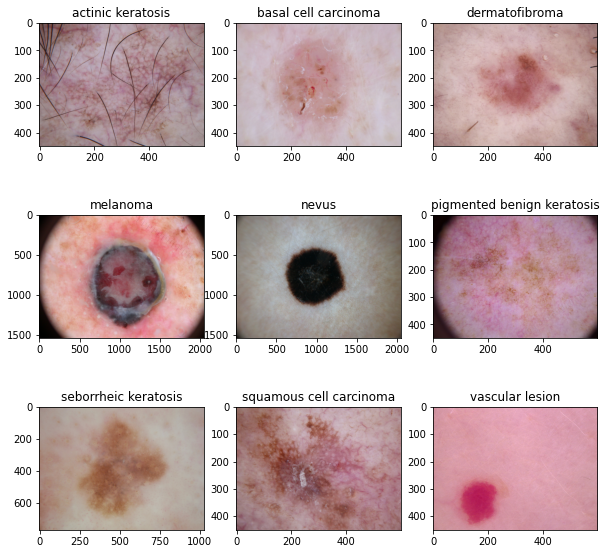

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(9): 
  plt.subplot(3, 3, i + 1)
  image = plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)
### your code goes here, you can use training or validation data to visualize

The image_batch is a tensor of the shape (32, 180, 180, 3). This is a batch of 32 images of shape 180x180x3 (the last dimension refers to color channels RGB). The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.

Dataset.cache() keeps the images in memory after they're loaded off disk during the first epoch.

Dataset.prefetch() overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Create the model
Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use layers.experimental.preprocessing.Rescaling to normalize pixel values between (0,1). The RGB channel values are in the [0, 255] range. This is not ideal for a neural network. Here, it is good to standardize values to be in the [0, 1]

In [ ]:
### Your code goes here
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

Compile the model
Choose an appropirate optimiser and loss function for model training

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                    

Train the model

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - ETA: 0s - loss: 2.0629 - accuracy: 0.1964

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


56/56 [==============================] - 622s 11s/step - loss: 2.0629 - accuracy: 0.1964 - val_loss: 2.0275 - val_accuracy: 0.1924
Epoch 2/20
56/56 [==============================] - 508s 9s/step - loss: 2.0229 - accuracy: 0.2143 - val_loss: 2.0018 - val_accuracy: 0.1924
Epoch 3/20
56/56 [==============================] - 510s 9s/step - loss: 2.0232 - accuracy: 0.2076 - val_loss: 2.0346 - val_accuracy: 0.2058
Epoch 4/20
56/56 [==============================] - 507s 9s/step - loss: 2.0173 - accuracy: 0.1998 - val_loss: 2.0373 - val_accuracy: 0.2058
Epoch 5/20
56/56 [==============================] - 500s 9s/step - loss: 2.0213 - accuracy: 0.2003 - val_loss: 2.0414 - val_accuracy: 0.2058
Epoch 6/20
56/56 [==============================] - 504s 9s/step - loss: 2.0068 - accuracy: 0.2098 - val_loss: 2.0197 - val_accuracy: 0.2013
Epoch 7/20
56/56 [==============================] - 504s 9s/step - loss: 2.0017 - accuracy: 0.2042 - val_loss: 2.0489 - val_accuracy: 0.2081
Epoch 8/20
56/56 [=====

Visualizing training results

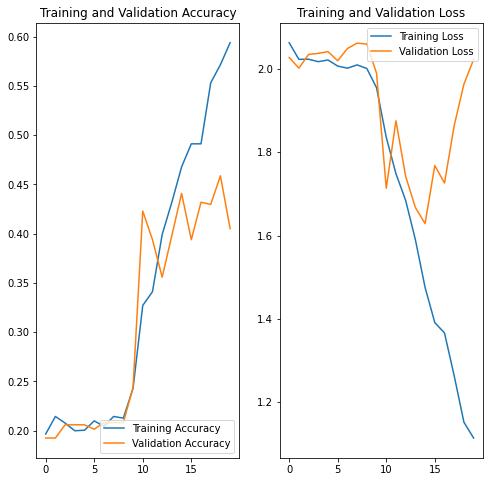

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

Finding on the first base model

The model is overfitting because we can also see difference in loss functions in training & test around the 10-11th epoch

The accuracy is just around 75-80% because there are enough features to remember the pattern.

But again, it's too early to comment on the overfitting & underfitting debate

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
data_augument = keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])

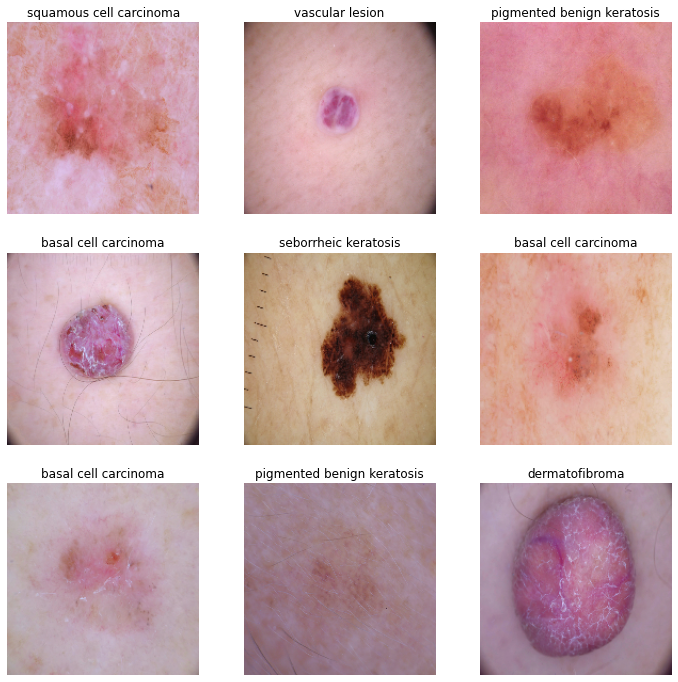

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.

plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_augument(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

Todo:
Create the model, compile and train the model

In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([ data_augument,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))


compiling the model

In [ ]:
### Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


56/56 [==============================] - 570s 10s/step - loss: 2.0689 - accuracy: 0.1953 - val_loss: 2.0470 - val_accuracy: 0.2081
Epoch 2/20
56/56 [==============================] - 576s 10s/step - loss: 2.0252 - accuracy: 0.2377 - val_loss: 2.0042 - val_accuracy: 0.2036
Epoch 3/20
56/56 [==============================] - 574s 10s/step - loss: 1.9369 - accuracy: 0.2545 - val_loss: 1.8984 - val_accuracy: 0.2886
Epoch 4/20
56/56 [==============================] - 570s 10s/step - loss: 1.8766 - accuracy: 0.2896 - val_loss: 1.8713 - val_accuracy: 0.2685
Epoch 5/20
56/56 [==============================] - 571s 10s/step - loss: 1.7930 - accuracy: 0.3259 - val_loss: 1.7566 - val_accuracy: 0.3356
Epoch 6/20
56/56 [==============================] - 572s 10s/step - loss: 1.7341 - accuracy: 0.3638 - val_loss: 1.6767 - val_accuracy: 0.4116
Epoch 7/20
56/56 [==============================] - 564s 10s/step - loss: 1.6690 - accuracy: 0.3850 - val_loss: 1.6420 - val_accuracy: 0.3870
Epoch 8/20
56/56 

Visualizing the results

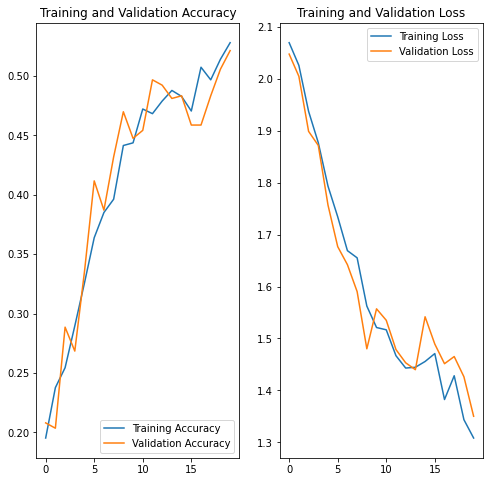

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

Finding from Second Model

There is no improvement in accuracy but we can definitely see the overfitting problem has solved due to data augmentation

We can increase the epochs to increase the accuracy so it's too early for judgement

Todo: Find the distribution of classes in the training dataset.
Context: Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [ ]:
##
path_list=[]
lesion_list=[]
for i in class_names:
      
    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/drive/My Drive/Machine_Learning/Skin_...,actinic keratosis
1,/content/drive/My Drive/Machine_Learning/Skin_...,actinic keratosis
2,/content/drive/My Drive/Machine_Learning/Skin_...,actinic keratosis
3,/content/drive/My Drive/Machine_Learning/Skin_...,actinic keratosis
4,/content/drive/My Drive/Machine_Learning/Skin_...,actinic keratosis
...,...,...
2234,/content/drive/My Drive/Machine_Learning/Skin_...,vascular lesion
2235,/content/drive/My Drive/Machine_Learning/Skin_...,vascular lesion
2236,/content/drive/My Drive/Machine_Learning/Skin_...,vascular lesion
2237,/content/drive/My Drive/Machine_Learning/Skin_...,vascular lesion


In [ ]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/drive/My Drive/Machine_Learning/Skin_...,actinic keratosis
1,/content/drive/My Drive/Machine_Learning/Skin_...,actinic keratosis
2,/content/drive/My Drive/Machine_Learning/Skin_...,actinic keratosis
3,/content/drive/My Drive/Machine_Learning/Skin_...,actinic keratosis
4,/content/drive/My Drive/Machine_Learning/Skin_...,actinic keratosis
...,...,...
2234,/content/drive/My Drive/Machine_Learning/Skin_...,vascular lesion
2235,/content/drive/My Drive/Machine_Learning/Skin_...,vascular lesion
2236,/content/drive/My Drive/Machine_Learning/Skin_...,vascular lesion
2237,/content/drive/My Drive/Machine_Learning/Skin_...,vascular lesion


<BarContainer object of 9 artists>

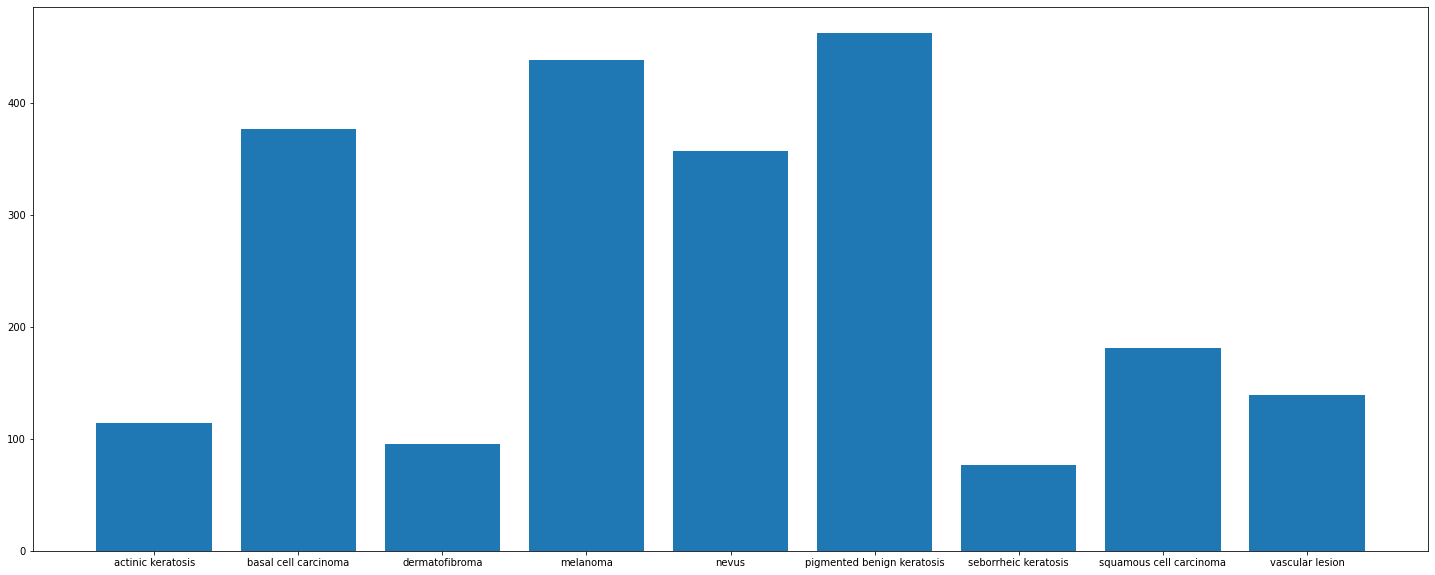

In [ ]:
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

Todo: Write your findings here:
- Which class has the least number of samples?
- Which classes dominate the data in terms proportionate number of samples?

Answer-1 :- squamous cell carcinoma has least number of samples

Answer-2:- actinic keratosis and dermatofibroma have proportionate number of classes. melanoma and pigmented benign keratosis have proprtionate number of classes

In [ ]:
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'output',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

Todo: Rectify the class imbalance
Context: You can use a python package known as Augmentor (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#path_to_training_dataset=""/content/drive/My Drive/Machine_Learning/Skin_Cancer/Train"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline("/content/drive/My Drive/Machine_Learning/Skin_Cancer/Train",save_format='jpg')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.
    

Initialised with 2239 image(s) found.
Output directory set to /content/drive/My Drive/Machine_Learning/Skin_Cancer/Train/output.

Processing <PIL.Image.Image image mode=RGB size=1008x711 at 0x7FA202072750>: 100%|██████████| 500/500 [00:50<00:00,  9.87 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/My Drive/Machine_Learning/Skin_Cancer/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FA2020412D0>: 100%|██████████| 500/500 [00:51<00:00,  9.80 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/My Drive/Machine_Learning/Skin_Cancer/Train/output.

Processing <PIL.Image.Image image mode=RGB size=722x542 at 0x7FA207D31A90>: 100%|██████████| 500/500 [00:57<00:00,  8.76 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/My Drive/Machine_Learning/Skin_Cancer/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FA2083DFF50>: 100%|██████████| 500/500 [00:46<00:00, 10.84 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/My Drive/Machine_Learning/Skin_Cancer/Train/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7FA20160F790>: 100%|██████████| 500/500 [01:03<00:00,  7.88 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/My Drive/Machine_Learning/Skin_Cancer/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FA202041B90>: 100%|██████████| 500/500 [00:58<00:00,  8.56 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/My Drive/Machine_Learning/Skin_Cancer/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FA20160F790>: 100%|██████████| 500/500 [00:53<00:00,  9.37 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/My Drive/Machine_Learning/Skin_Cancer/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FA2084152D0>: 100%|██████████| 500/500 [00:50<00:00,  9.90 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/My Drive/Machine_Learning/Skin_Cancer/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FA2020D9590>: 100%|██████████| 500/500 [00:54<00:00,  9.14 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
data_dir_train1 = pathlib.Path("/content/drive/My Drive/Machine_Learning/Skin_Cancer/Train/output")
image_count_train1 = len(list(data_dir_train1.glob('*/*.jpg')))
print(image_count_train1)

4500


In [ ]:
##
for i in class_names:
      
    for j in data_dir_train1.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
new_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
new_df

,Path,Label
0,/content/drive/My Drive/Machine_Learning/Skin_...,actinic keratosis
1,/content/drive/My Drive/Machine_Learning/Skin_...,actinic keratosis
2,/content/drive/My Drive/Machine_Learning/Skin_...,actinic keratosis
3,/content/drive/My Drive/Machine_Learning/Skin_...,actinic keratosis
4,/content/drive/My Drive/Machine_Learning/Skin_...,actinic keratosis
...,...,...
6734,/content/drive/My Drive/Machine_Learning/Skin_...,vascular lesion
6735,/content/drive/My Drive/Machine_Learning/Skin_...,vascular lesion
6736,/content/drive/My Drive/Machine_Learning/Skin_...,vascular lesion
6737,/content/drive/My Drive/Machine_Learning/Skin_...,vascular lesion


Todo: Train the model on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
import pathlib
data_dir_train1=pathlib.Path("/content/drive/My Drive/Machine_Learning/Skin_Cancer/Train/output")
#data_dir_train1=pathlib.Path("/content/drive/My Drive/Machine_Learning/Skin_Cancer/Train")


In [ ]:
data_dir_train1

PosixPath('/content/drive/My Drive/Machine_Learning/Skin_Cancer/Train/output')

Todo: Create a training dataset

In [ ]:
image_count_train1 = len(list(data_dir_train1.glob('*/*.jpg')))
print(image_count_train1)

4500


In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


data_dir_train1=pathlib.Path("/content/drive/My Drive/Machine_Learning/Skin_Cancer/Train/output")
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4500 files belonging to 9 classes.
Using 3600 files for training.


Todo: Create a validation dataset

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4500 files belonging to 9 classes.
Using 900 files for validation.


Todo: Create your model (make sure to include normalization)

In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([ 
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))



Todo: Compile your model (Choose optimizer and loss function appropriately)



In [ ]:

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Todo: Train your model

In [ ]:
epochs =20
## Your code goes here, use 20 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


113/113 [==============================] - 1254s 11s/step - loss: 2.0623 - accuracy: 0.1964 - val_loss: 2.0332 - val_accuracy: 0.1967
Epoch 2/20
113/113 [==============================] - 1144s 10s/step - loss: 2.0421 - accuracy: 0.2006 - val_loss: 2.0285 - val_accuracy: 0.1989
Epoch 3/20
113/113 [==============================] - 1146s 10s/step - loss: 2.0376 - accuracy: 0.1908 - val_loss: 2.0241 - val_accuracy: 0.1978
Epoch 4/20
113/113 [==============================] - 1144s 10s/step - loss: 2.0256 - accuracy: 0.1939 - val_loss: 2.0235 - val_accuracy: 0.1989
Epoch 5/20
113/113 [==============================] - 1146s 10s/step - loss: 2.0249 - accuracy: 0.1964 - val_loss: 2.0227 - val_accuracy: 0.1989
Epoch 6/20
113/113 [==============================] - 1145s 10s/step - loss: 2.0261 - accuracy: 0.2019 - val_loss: 2.0230 - val_accuracy: 0.2000
Epoch 7/20
113/113 [==============================] - 1144s 10s/step - loss: 2.0246 - accuracy: 0.1908 - val_loss: 2.0219 - val_accuracy: 0.1

Todo: Visualize the model results

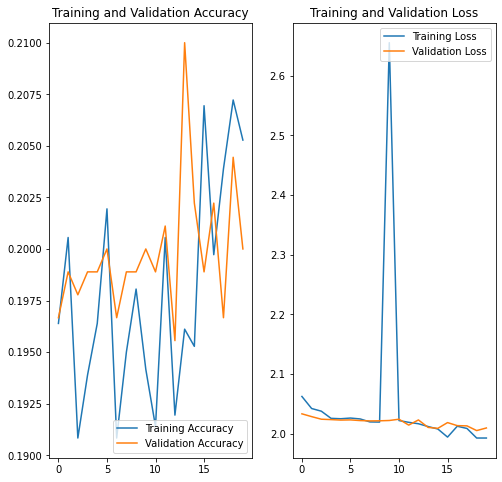

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()